# Lasso regressor

In [7]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
from sklearn import linear_model
import sklearn

dataset = sklearn.datasets.fetch_california_housing()
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

#Lasso regression model
print("\n.........................Lasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


.........................Lasso Model............................................

The train score for ls model is 0.0006039472716750094
The test score for ls model is 0.000314867914498862


In [17]:
## prediction for lasso
y_pred_0 = lasso.predict(X_test)
print(r2_score(y_test,y_pred_0))

## prediction for Ridge
y_pred_2 = ridgeReg.predict(X_test)
print(r2_score(y_test,y_pred_2))

## prediction for Elastic
y_pred_1 = enet_model.predict(X_test)
print(r2_score(y_test,y_pred_1))

0.000314867914498862
0.6046435351561679
0.4177298795134846


In [8]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# Ridge Regressor

In [6]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=100)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


The train score for lr model is 0.6109633715458154
The test score for lr model is 0.591169543641048

Ridge Model............................................

The train score for ridge model is 0.6106599094227464
The test score for ridge model is 0.5902139854822974


# Using cross validation

We may need to try out different alpha values to find the optimal constraint value. For this case, we can use the cross-validation model in the sklearn package. This will try out different combinations of alpha values and then choose the best model.




 # Lasso Cross validation

In [18]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))


0.606383972592905
0.604626197272006


Using an alpha value of 10, the evaluation of the model, the train, and test data indicate better performance on the ridge model than on the linear regression model.

# Ridge Cross validation

In [19]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.6064172976629851
The train score for ridge model is 0.6049277248626737


0.0001 [ 4.38725041e-01  9.60573216e-03 -1.02607317e-01  6.13113796e-01
 -7.60040055e-06 -4.48887838e-03 -4.17236219e-01 -4.30443252e-01]
0.00021544346900318845 [ 4.38302495e-01  9.61391144e-03 -1.01794733e-01  6.08938831e-01
 -7.56305472e-06 -4.48945068e-03 -4.17101115e-01 -4.30245638e-01]
0.00046415888336127773 [ 4.37392131e-01  9.63153273e-03 -1.00044046e-01  5.99944032e-01
 -7.48259718e-06 -4.49068359e-03 -4.16810078e-01 -4.29819929e-01]
0.001 [ 4.35430588e-01  9.66949146e-03 -9.62719961e-02  5.80564052e-01
 -7.30927570e-06 -4.49333892e-03 -4.16183481e-01 -4.28903173e-01]
0.002154434690031882 [ 4.31204047e-01  9.75125876e-03 -8.81446225e-02  5.38808130e-01
 -6.93591112e-06 -4.49905750e-03 -4.14834520e-01 -4.26929052e-01]
0.004641588833612777 [ 4.22097249e-01  9.92739780e-03 -7.06333349e-02  4.48842020e-01
 -6.13160704e-06 -4.51137374e-03 -4.11930165e-01 -4.22677769e-01]
0.01 [ 4.02474124e-01  1.03068044e-02 -3.29020231e-02  2.54997948e-01
 -4.39905667e-06 -4.53789547e-03 -4.0567889

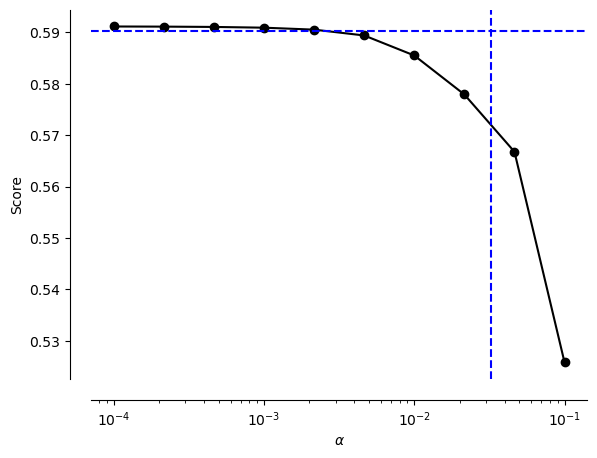

In [5]:


alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    X_train,
    y_train,
    return_estimator=True,
    n_jobs=2,
) 
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.606 ± 0.006


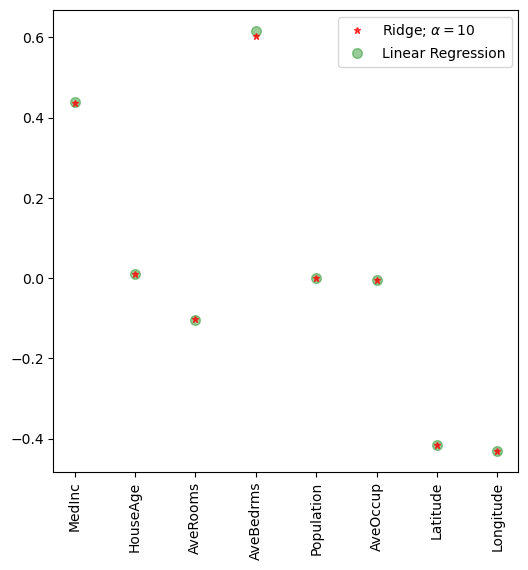

In [30]:
#We can also plot the coefficients for both the linear and ridge models.


plt.figure(figsize = (6,6))
plt.plot(dataset.feature_names,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(dataset.feature_names,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

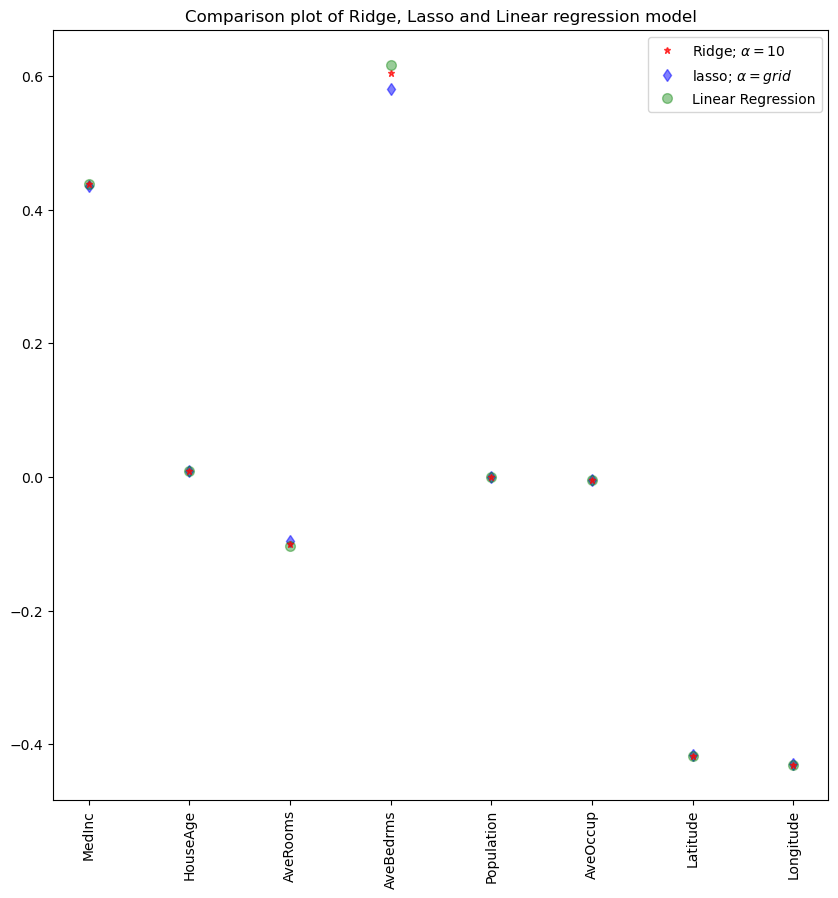

In [31]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(dataset.feature_names,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(dataset.feature_names,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()


# Elastic net regressor

In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
enet_model = ElasticNet().fit(X_train, y_train)

In [12]:
enet_model.coef_

array([ 2.54025141e-01,  1.17293329e-02,  0.00000000e+00, -0.00000000e+00,
        1.07104254e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [13]:
enet_model.intercept_

0.7306713874373953

In [14]:
enet_model.predict(X_train)[:10]

array([2.59412451, 2.50317788, 1.88533748, 2.1883744 , 1.69654747,
       2.05883444, 2.5140281 , 2.07442705, 1.38205415, 2.24257197])

In [15]:
enet_model.predict(X_test)[:10]

array([2.1040646 , 1.64497978, 1.84635357, 2.58918483, 1.51226167,
       1.91741146, 2.11052391, 1.61976716, 1.87623127, 1.93822037])

In [13]:
y_pred = enet_model.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,y_pred))
mse

0.8792160235273742

In [14]:
r2_score(y_test,y_pred)

0.4151980682495934

In [15]:
'if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.'

'if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.'

# Model Tuning
The operations using the ElasticNetCV method to find the optimum lambda value.

In [18]:
from sklearn.linear_model import ElasticNetCV

enet_cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)

# If we don't give the lambdas, what's the alpha?

enet_cv_model.alpha_

0.06772827165589806

Accordingly, we find the alpha value as 0.06772.

Afterward, we can find the constant of the model established with ElasticNetCV as follows.

In [19]:
enet_cv_model.intercept_

-24.329605487007292

In [20]:
enet_cv_model.coef_

array([ 3.87365004e-01,  1.21981285e-02,  7.65407328e-04,  0.00000000e+00,
        2.09063082e-06, -4.55230161e-03, -2.94856253e-01, -2.93272182e-01])

In [23]:
# Let's create the final model according to optimum alpha.

enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

# Let's now calculate the error for the test set using this final model.

y_pred_1 = enet_tuned.predict(X_test)
r2_score(y_test,y_pred_1)
np.sqrt(mean_squared_error(y_test,y_pred_1))

0.7556554538745298

0.568018396646083